In [1]:
import os
import sys
import pandas as pd

In [2]:
partition = input("Inserisci la partizione che vuoi utilizzare")
domain = "fourier" if partition[:2].lower() == "pf" else "time"
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)
foldername = os.path.join("./xgboost", domain, foldername)
print(foldername)

Hai inserito la partizione:  pf_sq50_ws8_st4
Hai inserito la cartella:  test_4
./xgboost/fourier/test_4


In [3]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-03-21 00:16:33.849663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-X.Y/lib64
2025-03-21 00:16:33.849681: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


GPU disponibile: []


2025-03-21 00:16:38.330780: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-21 00:16:38.330815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paolo-Katana-15-B13VFK): /proc/driver/nvidia/version does not exist


In [4]:
sys.path.append("../models")

In [5]:
from xgboost_model import XGBoostModel

In [6]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

In [7]:
# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (44763, 800), y_train shape: (44763, 16)
X_test shape: (9592, 800), y_test shape: (9592, 16)
X_val shape: (9591, 800), y_val shape: (9591, 16)


In [8]:
# initialize model
xgboost_model = XGBoostModel(foldername, n_estimators=2, output_units=y_train.shape[1])

In [9]:
# training
xgboost_model.train(X_train, y_train, X_val, y_val)

[0]	validation_0-rmse:0.25592	validation_0-mae:0.15586	validation_1-rmse:0.25109	validation_1-mae:0.15338
[1]	validation_0-rmse:0.24436	validation_0-mae:0.14972	validation_1-rmse:0.23998	validation_1-mae:0.14751
Tempo di addestramento salvato in ./xgboost/fourier/test_4/training_time.txt
Modello salvato in ./xgboost/fourier/test_4/xgboost_model.joblib


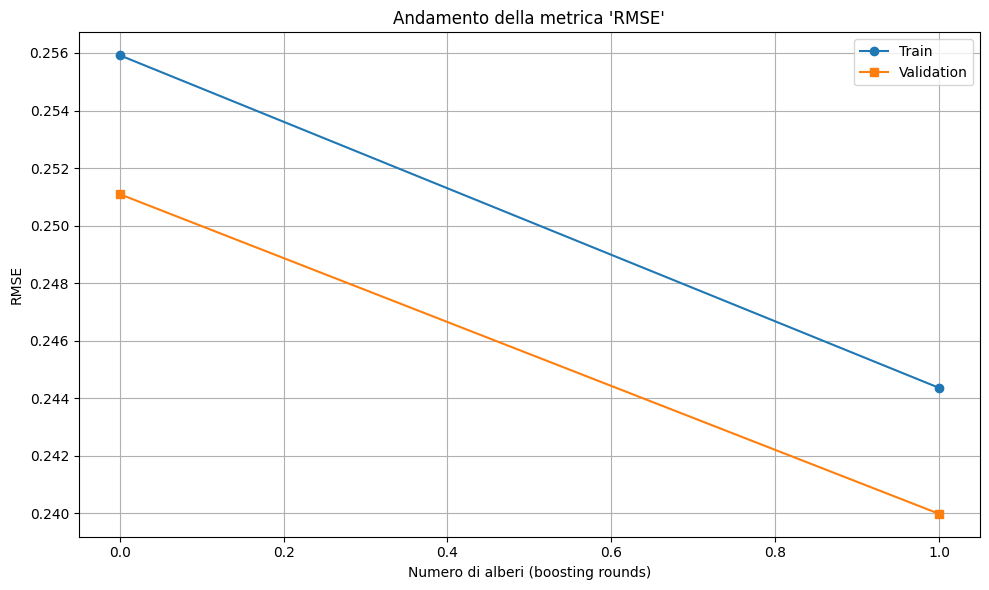

Grafico 'rmse' salvato in: ./xgboost/fourier/test_4/rmse_trend.png


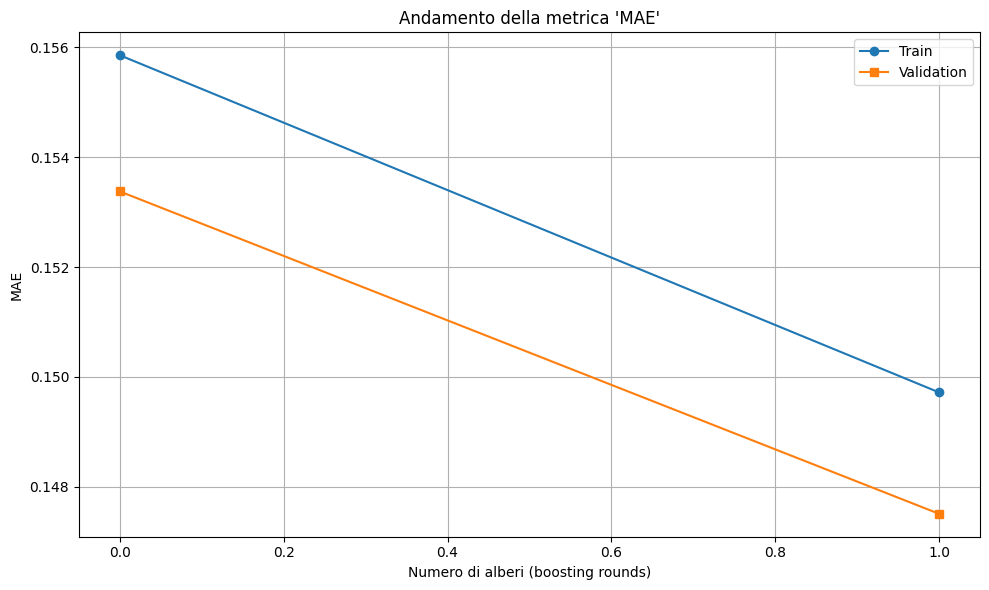

Grafico 'mae' salvato in: ./xgboost/fourier/test_4/mae_trend.png


In [10]:
xgboost_model.plot_training_metrics()

In [11]:
xgboost_model.evaluate(X_test, y_test)

Metriche dettagliate salvate in: ./xgboost/fourier/test_4/evaluation_metrics_detailed.csv
Metriche medie salvate in: ./xgboost/fourier/test_4/evaluation_metrics_mean.csv


{'detailed': {'Output': ['Output 1',
   'Output 2',
   'Output 3',
   'Output 4',
   'Output 5',
   'Output 6',
   'Output 7',
   'Output 8',
   'Output 9',
   'Output 10',
   'Output 11',
   'Output 12',
   'Output 13',
   'Output 14',
   'Output 15',
   'Output 16'],
  'MSE': [0.3495673776059226,
   0.07525468615792605,
   0.028314231921054166,
   0.015978723561847482,
   0.02016010472060045,
   0.01600299729215819,
   0.028075595831786888,
   0.07529264580868975,
   1.1398377025450744e-08,
   0.11504713664722914,
   0.026352517757156,
   0.008643144152810778,
   1.1398377025450744e-08,
   0.008708384286676345,
   0.026379201415564935,
   0.11637303721198751],
  'RMSE': [0.5912422325966935,
   0.2743258758446349,
   0.16826833309049616,
   0.12640697592240502,
   0.1419862835649995,
   0.1265029536894621,
   0.1675577388000533,
   0.27439505427155525,
   0.00010676318197511137,
   0.339185991230813,
   0.16233458583171978,
   0.09296851161985319,
   0.00010676318197511137,
   0.09331

In [12]:
xgboost_model.save_model()

Modello salvato in ./xgboost/fourier/test_4/xgboost_model.joblib


In [13]:
y_pred = xgboost_model.predict(X_test)

In [14]:
xgboost_model.compare_predictions(y_test, y_pred)

Confronto predizioni salvato in ./xgboost/fourier/test_4/predictions_comparison.csv


,Valore Reale 1,Valore Reale 2,Valore Reale 3,Valore Reale 4,Valore Reale 5,Valore Reale 6,Valore Reale 7,Valore Reale 8,Valore Reale 9,Valore Reale 10,...,Predizione 7,Predizione 8,Predizione 9,Predizione 10,Predizione 11,Predizione 12,Predizione 13,Predizione 14,Predizione 15,Predizione 16
0,-0.541899,0.287370,-0.160179,-0.068907,-0.017050,-0.068907,-0.160179,0.287370,0.0,-0.149704,...,-0.012319,0.067923,-0.000107,-0.005492,-0.022775,0.012879,-0.000107,-0.011196,0.025492,0.009234
1,-0.149829,-0.026179,-0.134233,-0.065249,0.069870,-0.065249,-0.134233,-0.026179,0.0,0.350976,...,-0.000310,-0.018867,-0.000107,0.026363,0.009009,0.000917,-0.000107,-0.003720,-0.004798,-0.028632
2,-0.486718,0.338305,0.140754,-0.048047,0.054065,-0.048047,0.140754,0.338305,0.0,0.406018,...,0.021402,0.015192,-0.000107,0.042720,0.001770,-0.004917,-0.000107,0.005581,-0.003478,-0.043748
3,1.186588,0.298354,0.053275,-0.017662,-0.177865,-0.017662,0.053275,0.298354,0.0,-0.104762,...,0.000737,0.037559,-0.000107,-0.089448,-0.036455,-0.015606,-0.000107,0.007334,0.033674,0.067087
4,-0.987029,-0.080617,-0.136116,-0.055963,0.000692,-0.055963,-0.136116,-0.080617,0.0,-0.003933,...,-0.018359,-0.005241,-0.000107,0.025437,0.006373,0.028685,-0.000107,-0.027540,-0.005896,-0.027521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,-0.566529,-0.274223,-0.043699,0.044488,0.062659,0.044488,-0.043699,-0.274223,0.0,0.149657,...,-0.011260,-0.033729,-0.000107,0.027207,0.018458,0.012643,-0.000107,-0.012028,-0.015485,-0.034790
9588,0.205035,0.077034,-0.462366,-0.125072,-0.018171,-0.125072,-0.462366,0.077034,0.0,0.332210,...,-0.014028,0.025365,-0.000107,0.010781,-0.011317,0.008752,-0.000107,-0.019611,0.007644,0.001292
9589,-0.626730,0.264746,0.290482,0.137827,0.159333,0.137827,0.290482,0.264746,0.0,-0.418692,...,0.006026,0.025653,-0.000107,0.004031,-0.012196,-0.008660,-0.000107,0.020668,0.006103,-0.005666
9590,-0.123616,-0.394788,-0.084692,0.189484,0.277460,0.189484,-0.084692,-0.394788,0.0,-0.498454,...,-0.023385,-0.093571,-0.000107,-0.025794,0.039842,0.006546,-0.000107,-0.007829,-0.041718,0.007308


In [15]:
xgboost_model.save_training_history_txt()

Training history salvata in ./xgboost/fourier/test_4/training_history.txt


In [17]:
xgboost_model.save_parameters()

Parametri salvati in ./xgboost/fourier/test_4/model_parameters.txt
